## Sales' Data Analysis

---



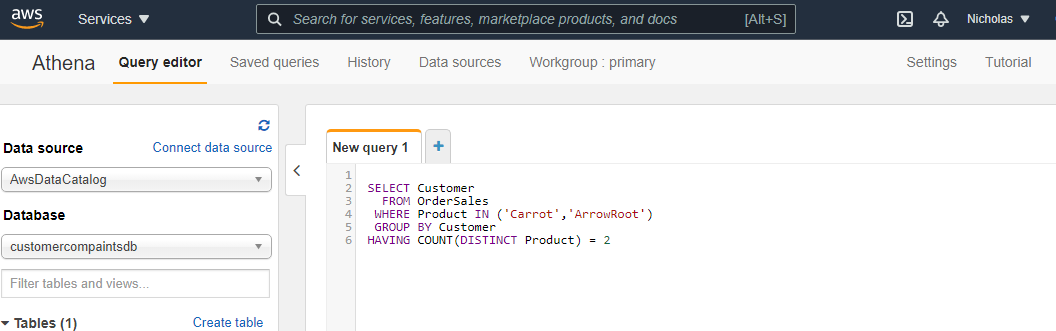

1. Which orders sold between 1128 and 1404 dollars?

In [ ]:
SELECT * FROM OrderSales WHERE Units BETWEEN 1228 AND 1404

  2. We want to understand the total sales in Units sold above 1228

In [ ]:
SELECT COUNT(Units) FROM OrderSales WHERE Units>1228

  3. Help us understand orders not within our targeted sale which is between 1228 1404 dollars.

In [ ]:
SELECT * FROM OrderSales WHERE Units NOT BETWEEN 1228 AND 1404

   4. In 2016 and 2018 we hired Expertmarketers company to promote our products let's see which orders sold between 17/07/2016 and 28/05/2018 and evaluate our strategy

In [ ]:
SELECT * FROM OrderSales WHERE OderDate BETWEEN '17-07-2016' AND '28-05-2018'

   5. Last month we ran a marketing campaign in NYC, Paris and Madrid are there customers from these regions? 

In [ ]:
SELECT * FROM [Customers].[dbo].[OrderSales]
WHERE City IN ('NYC', 'Paris', 'Madrid')

   6. List the number of customers in each country, ordered by the country with the most customers first.

In [ ]:
SELECT COUNT(Id), Country FROM OrderSales
 GROUP BY Country

  7. We recently ran a Facebook marketing across countries in US and Asia, Let's see how many orders not from our business operations.

In [ ]:
SELECT COUNT ('Units') FROM OrderSales
WHERE City NOT IN ('NYC', 'Paris', 'Madrid', 'San Francisco', 'Melbourne')

   8. Help us categorize in 3 classes the size of deals according to the units sold

In [ ]:
SELECT OrderId, Customer, Product,
CASE WHEN Units<1000 THEN 'Small Deals'
	 WHEN Units<1500 THEN 'Medium Deals'
	 WHEN Units<2000 THEN 'Big Deals'
	 else 'Huge Deals' end as DealSize
FROM [Customers].[dbo].[OrderSales]

    9. Our company will be migrating the on-premis database to cloud and the CTO suggested a creation a dataset snapshot before the migration begins, help us achieve this Hint: *Creating a Spin-Off table copy into the same db this prevents jeopandizing the original data or I want to share specific data to specific dept*

 

In [ ]:
SELECT * INTO OrderSalesBackup FROM OrderSales

  10. As part of CSR our company will be in the next 5 months supporting SQL Hackthons and will be providing some of our customer order data with specific columns to competing teams to perform querries on, The query should be reusable in each month since new data will be coming in. Help achieve this objective. 
*This will require a view which can be rerun in the subsequent months to generate the required fields.* 

In [ ]:
/*This view can be run every month to generate updated data for the hackthon*/

CREATE VIEW VWSQLHackthon AS 
SELECT OrderId, Customer, Category, Units, Cost
FROM OrderSales

  11. We want to allow the marketing team to do a departmental analysis with the customer data but be able to see the Revenue generated. 

In [ ]:
SELECT OrderId, Customer, Category, Units, Cost
INTO MarketTeamdata FROM OrderSales

   12. How many categories do we have this year? Lets get total count of categories in our order 


In [ ]:
SELECT Category, COUNT(OrderId) TotalOrders FROM OrderSales GROUP BY Category

   13. Help us get the orders sold more than evarage sale price
*Let's say we want to get the list of products which sold higher than the average, in such a case, we write a subquery*

In [ ]:
SELECT OrderId, Customer, Product, Sales1 FROM OrderSales WHERE Sales1> (SELECT AVG(Sales1) FROM OrderSales)*/


  14. Paul has been our best customer for long, could there be any customer who bought more than Paul? *Hint: Here here we write a subquery*

In [ ]:
SELECT OrderId, Customer, Sales1 FROM OrderSales WHERE Sales1> (SELECT Sales1 FROM OrderSales WHERE Customer='Paul')*/


   15. Lets say I want to count how many times NYC city appears in our customer order dataset

In [ ]:
SELECT COUNT(City) FROM OrderSales WHERE City = 'NYC'

   16. How much in total combiend salary in each dept

In [ ]:
SELECT OrderId, Customer, Category, SUM(Units) OVER (PARTITION BY Category) AS CategoryUnits FROM OrderSales*/

   17. Help us rank our valued customers by number of purchases, profits

In [ ]:

SELECT Customer, Units, RANK() OVER (ORDER BY Units desc) as Rankings FROM OrderSales*/

   18. Ranking the top products sold by number of units sold


In [ ]:
SELECT OrderId, Category, Product,Units, RANK() OVER (ORDER BY Units desc) AS Rankings FROM OrderSales

   19. Let's write a SQL query to rank units, and If there is a tie between two units, both should have the same ranking. 
After a tie, the next ranking number should be the next consecutive integer value


In [ ]:
SELECT OrderId, Category, Product,Units, DENSE_RANK() OVER(ORDER BY Units DESC) AS Ranks FROM OrderSales

20. Help us compare the sales for last month and present month Hint:
Comparing the difference between each month's sales to last month *italicized text*

In [ ]:
SELECT OderDate, Sales1, Sales1 - LAG(Sales1, 1) OVER (ORDER BY OderDate) AS SalesDiff
FROM OrderSales*/

   21. How do our sales compare with last year in individual months? *Here we  Compare each month's sales to the same month last year*

In [ ]:
SELECT OderDate, Sales2, Sales2 - LAG(Sales1, 12) OVER (ORDER BY OderDate) AS YearlyDiff
FROM OrderSales

  22. How much cumulative revenue did the company make for each year

In [ ]:
SELECT OderDate, Revenue, SUM(Revenue) OVER (ORDER BY OderDate) AS CumulativeSales FROM OrderSales*/


   23. Write a SQL query to find all dates' Ids with higher sales compared to its previous (yesterday's) dates.

In [ ]:
SELECT a.OrderId FROM OrderSales a, OrderSales b WHERE a.Sales1 > b.Sales1 AND DATEDIFF(a.OderDate, b.OderDate, datespend) = 1*/


   24. Report customes who bought Potato Chips but never bought Chocolate Chips and Carrot. 

In [ ]:
SELECT DISTINCT OrderId FROM OrderSales HAVING SUM(CASE WHEN Product = ‘Potato Chips’ THEN 1 ELSE 0 END) > 0
AND SUM(CASE WHEN Product = ‘Chocolate Chip’ THEN 1 ELSE 0 END) = 0 
AND SUM(CASE WHEN Product = ‘Carrot’ THEN 1 ELSE 0 END) = 0

   25. Find Customers that bought either "Carrot" OR "Chocolate Chip"

In [ ]:
 SELECT Customer
   FROM OrderSales
  WHERE Product IN ('Carrot','Chocolate Chip')

26. Find Customers that bought either "Carrot" OR "Chocolate Chip"

In [ ]:
  SELECT Customer, ProductCount = COUNT(*) FROM OrderSales
  WHERE Product IN ('Carrot','Chocolate Chip')
  GROUP BY Customer

   27. Find Customers that bought either "Carrot" OR "Chocolate" and count the DISTINCT number of products each bought.

In [ ]:
 SELECT OrderId,
        DistinctProductCount = COUNT(DISTINCT Product)
   FROM OrderSales
  WHERE Product IN ('Chocolate','Carrot')
  GROUP BY OrderId


   28. Find Customers that bought both "Carrot" AND "Chocolate Chip"

In [ ]:
SELECT Customer
   FROM OrderSales
  WHERE Product IN ('Carrot','Chocolate Chip')
  GROUP BY Customer
 HAVING COUNT(DISTINCT Product) = '2'

   29. Find Customers that bought "Arrowroot" only.

In [ ]:
 SELECT Customer
   FROM OrderSales
  WHERE Product IN ('Arrowroot')

30. Find Total number of Customers who bought "Whole Wheat".

In [ ]:

 SELECT COUNT(Customer) AS TotalCustomers
  FROM OrderSales 
  WHERE Product IN ('Whole Wheat')

31. Find Customers that bought "Carrot" AND "ArrowRoot" In this case HAVING is like a WHERE for GROUP BY

In [ ]:
 SELECT Customer
   FROM OrderSales
  WHERE Product IN ('Carrot','ArrowRoot')
  GROUP BY Customer
 HAVING COUNT(DISTINCT Product) = 2